<a href="https://colab.research.google.com/github/andersondev96/imersao-dados-python-alura/blob/main/Imers%C3%A3o_dados_com_Python_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Análise de Dados com Pandas

In [1]:
import pandas  as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [14]:
# Mapeamento das categorias de senioridade para português
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

# Aplicando o mapeamento à coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(senioridade)

# Verificando o resultado
display(df["senioridade"].value_counts())

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [15]:
# Mapeamento das categorias de contrato para português
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

# Aplicando o mapeamento à coluna 'contrato'
df['contrato'] = df['contrato'].replace(contrato)

# Verificando o resultado
display(df["contrato"].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Meio Período,376
Freelancer,16


In [16]:
# Mapeamento das categorias de tamanho_empresa para português
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

# Aplicando o mapeamento à coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].map(tamanho_empresa)

# Verificando o resultado
display(df["tamanho_empresa"].value_counts())

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [17]:
# Mapeamento das categorias de remoto para português
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Aplicando o mapeamento à coluna 'remoto'
df['remoto'] = df['remoto'].replace(remoto)

# Verificando o resultado
display(df["remoto"].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [19]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [20]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Aprenda a Limpar e Preparar os Dados


In [21]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [22]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [23]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [25]:
# Criando um dataframe

import numpy as np

# Criação de um dataframe de teste
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

''' Calcula a mediana e substitui os nulos pela mediana'''
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [26]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [27]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype('int64'))

## Aula 3 - Visualização de dados


In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

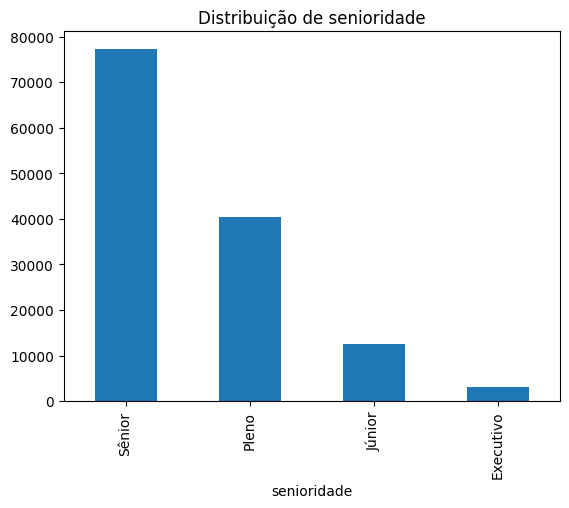

In [35]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [36]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

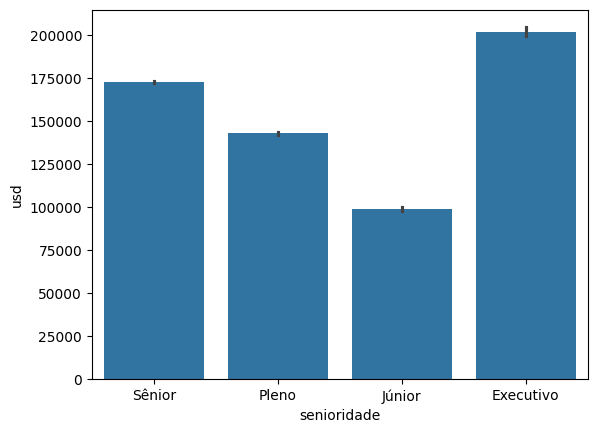

In [37]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [38]:
import matplotlib.pyplot as plt

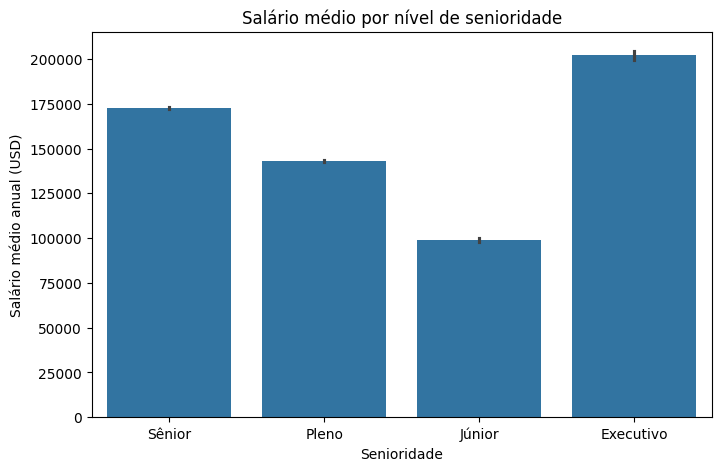

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por nível de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [40]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [41]:
order = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index

In [42]:
order

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

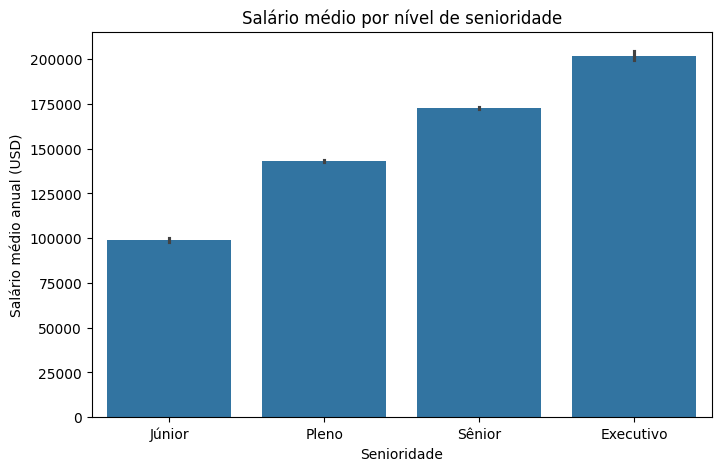

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=order)
plt.title("Salário médio por nível de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

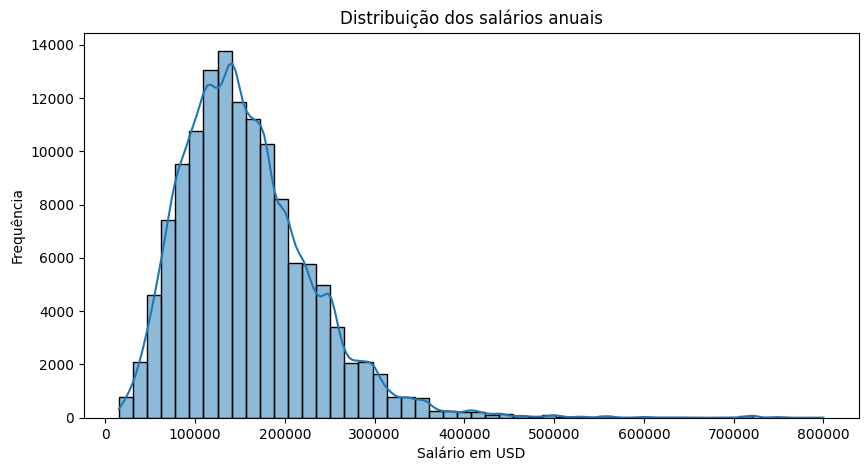

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

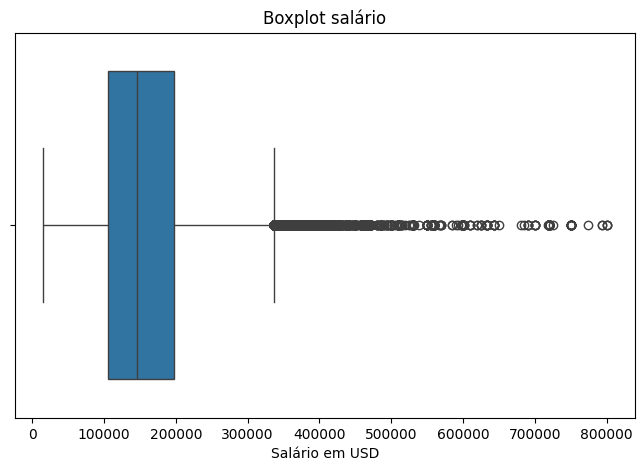

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot salário")
plt.xlabel("Salário em USD")
plt.show()

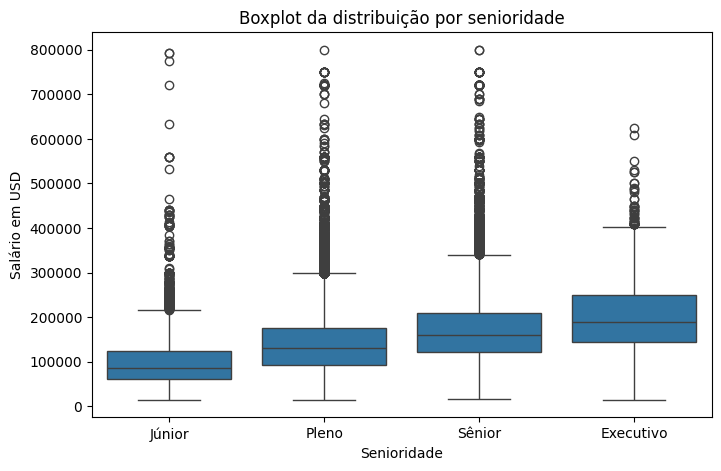

In [46]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")
plt.show()

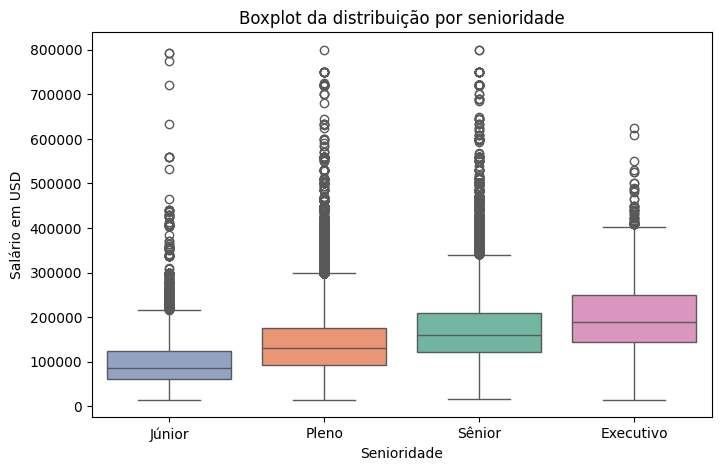

In [47]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")
plt.show()

In [48]:
import plotly.express as px

In [49]:
# Calcular a média salarial por senioridade
df_senioridade_usd = df_limpo.groupby("senioridade")["usd"].mean().reset_index()

# Definir a ordem das barras
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

# Criar o gráfico de barras interativo com Plotly Express
fig = px.bar(df_senioridade_usd,
             x="senioridade",
             y="usd",
             category_orders={"senioridade": ordem_senioridade},
             title="Média Salarial por Nível de Senioridade (USD)",
             labels={"senioridade": "Senioridade", "usd": "Salário Médio Anual (USD)"})

# Exibir o gráfico
fig.show()

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',

          )

fig.show()

In [51]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.update_traces(textinfo='percent+label')
fig.show()

In [52]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.3 MB/s eta 0:00:00


In [55]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [56]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,iso3,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA,USA


In [57]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)